# Phân lớp ảnh dùng Keras với VGG16 (pretrained-model)

Ví dụ sau minh hoạ một ứng dụng phân lớp ảnh (image classification).

Ứng dụng sử dụng thư viện Keras, với bộ phân lớp (classifier) đã được huấn luyện sẵn 
dùng mạng neural VGG16. Bộ dữ liệu dùng để huấn luyện là ImageNet-1K - có 1,000 nhãn (label).

Kết quả trả về là xác suất (prob) của từng nhãn - xác suất càng lớn - khả năng nhãn được gán càng cao.

Một demo tương tự có thể xem tại website: http://goliath.liacs.nl/

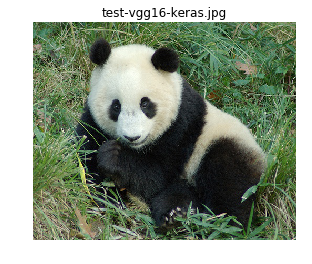

Predicted (labelID, labelName, prob): [('n02510455', 'giant_panda', 0.99896836), ('n02445715', 'skunk', 0.00042965519), ('n02133161', 'American_black_bear', 0.00040476894), ('n02509815', 'lesser_panda', 8.198127e-05), ('n02447366', 'badger', 2.7188315e-05)]


In [15]:
# written by B2DL 
# adapted from https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

from skimage import  io
import cv2
import matplotlib.pyplot as plt


# load image from URL - dùng skimage (opencv không hỗ trợ)
#url = 'http://k14.vcmedia.vn/2016/5-1461127393310.jpg'
url = 'http://farm1.static.flickr.com/116/265424705_d835d8dacb.jpg'
img = io.imread(url)
img_name = 'test-vgg16-keras.jpg'
cv2.imwrite(img_name, cv2.cvtColor(img, cv2.COLOR_RGB2BGR)) 

# đọc ảnh từ file
img = cv2.imread(img_name)

plt.axis('off')
plt.title(img_name)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# load the model 
# The first time you run this example, 
# Keras will download the weight files from the Internet 
# and store them in the ~/.keras/models directory.
model = VGG16()

# load an image from file
image = load_img(img_name, target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model 
# The network expects one or more images as input; 
# that means the input array will need to be 4-dimensional: 
# samples, rows, columns, and channels.
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
# the only preprocessing we do is subtracting the mean RGB value, 
# computed on the training set, from each pixel.
# Keras provides a function called preprocess_input() to prepare new input for the network.
image = preprocess_input(image)

# predict the probability across all output classes
# call the predict() function on the model 
# in order to get a prediction of the probability 
# of the image belonging to each of the 1000 known object types.
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat, top=5)[0]
print('Predicted (labelID, labelName, prob):', label)

# print deep model
# print(model.summary())
